In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sktime

## Italy Power Demand dataset

In [2]:
from sktime.datasets import load_italy_power_demand, load_basic_motions
X, y = load_italy_power_demand()

In [3]:
type(X)

pandas.core.frame.DataFrame

In [26]:
X.shape

(1096, 1)

In [27]:
y.shape

(1096,)

In [ ]:
X.columns

In [ ]:
# X.dim_0.str.split(n=3, expand=False)

In [ ]:
type(X.dim_0)

In [ ]:
X.dim_0.loc[1]

In [ ]:
y[y == '1'] = 0
y[y == '2'] = 1

In [ ]:
y = y.astype(int)
y
y[2]

Convert this to multi-track dataset

In [ ]:
year=1999
for i in X.index:
    if i % 12 == 0:
        year += 1
        print("New year: {}".format(year))
    dtindex = pd.date_range(start=pd.datetime(year, (i % 12) + 1, 1), periods=24, freq='d')
    a = X.dim_0.loc[i].to_frame(name='power')
    a['dtindex'] = dtindex
    a.set_index(keys='dtindex', drop=True, inplace=True)
    a['label'] = y[i]
    a.to_hdf('power.data.label.h5'.format(i), key='/data/{}'.format(i))

### Check Saved Power Demand Data

In [ ]:
a  = pd.read_hdf('power.data.label.h5', key='/data/12')

In [ ]:
type(a)

In [ ]:
a.index

### Extract has been run.  Now check output.

In [24]:
a  = pd.HDFStore('power.extract.h5')

In [25]:
print(a.keys())
a.close()

['/windows/data/0', '/windows/data/1', '/windows/data/10', '/windows/data/100', '/windows/data/1000', '/windows/data/1001', '/windows/data/1002', '/windows/data/1003', '/windows/data/1004', '/windows/data/1005', '/windows/data/1006', '/windows/data/1007', '/windows/data/1008', '/windows/data/1009', '/windows/data/101', '/windows/data/1010', '/windows/data/1011', '/windows/data/1012', '/windows/data/1013', '/windows/data/1014', '/windows/data/1015', '/windows/data/1016', '/windows/data/1017', '/windows/data/1018', '/windows/data/1019', '/windows/data/102', '/windows/data/1020', '/windows/data/1021', '/windows/data/1022', '/windows/data/1023', '/windows/data/1024', '/windows/data/1025', '/windows/data/1026', '/windows/data/1027', '/windows/data/1028', '/windows/data/1029', '/windows/data/103', '/windows/data/1030', '/windows/data/1031', '/windows/data/1032', '/windows/data/1033', '/windows/data/1034', '/windows/data/1035', '/windows/data/1036', '/windows/data/1037', '/windows/data/1038',

In [4]:
power_extracted_df = pd.read_hdf('power.extract.h5', '/windows/data/55')

In [5]:
power_extracted_df.shape

(1, 419)

In [6]:
# 'label' in power_extracted_df.columns

In [7]:
power_extracted_stats_df = power_extracted_df.describe()

In [8]:
power_extracted_stats_df.columns

Index(['power__variance_larger_than_standard_deviation',
       'power__has_duplicate_max', 'power__has_duplicate_min',
       'power__has_duplicate', 'power__sum_values', 'power__abs_energy',
       'power__mean_abs_change', 'power__mean_change',
       'power__mean_second_derivative_central', 'power__median',
       ...
       'power__fourier_entropy__bins_5', 'power__fourier_entropy__bins_10',
       'power__fourier_entropy__bins_100',
       'power__permutation_entropy__dimension_3__tau_1',
       'power__permutation_entropy__dimension_4__tau_1',
       'power__permutation_entropy__dimension_5__tau_1',
       'power__permutation_entropy__dimension_6__tau_1',
       'power__permutation_entropy__dimension_7__tau_1',
       'power__mean_n_absolute_max__number_of_maxima_7', 'label'],
      dtype='object', length=419)

In [9]:
np.sum(power_extracted_stats_df.loc['std'] != 0)

419

In [10]:
feats = power_extracted_stats_df.loc['std',power_extracted_stats_df.loc['std'] != 0].index

In [11]:
feats

Index(['power__variance_larger_than_standard_deviation',
       'power__has_duplicate_max', 'power__has_duplicate_min',
       'power__has_duplicate', 'power__sum_values', 'power__abs_energy',
       'power__mean_abs_change', 'power__mean_change',
       'power__mean_second_derivative_central', 'power__median',
       ...
       'power__fourier_entropy__bins_5', 'power__fourier_entropy__bins_10',
       'power__fourier_entropy__bins_100',
       'power__permutation_entropy__dimension_3__tau_1',
       'power__permutation_entropy__dimension_4__tau_1',
       'power__permutation_entropy__dimension_5__tau_1',
       'power__permutation_entropy__dimension_6__tau_1',
       'power__permutation_entropy__dimension_7__tau_1',
       'power__mean_n_absolute_max__number_of_maxima_7', 'label'],
      dtype='object', length=419)

In [12]:
power_extracted_df_cols_randsamp = power_extracted_df[feats].sample(n=10,axis='columns')

In [13]:
power_extracted_df_cols_randsamp.index

DatetimeIndex(['2004-08-24'], dtype='datetime64[ns]', freq=None)

In [23]:
power_extracted_df.index

DatetimeIndex(['2004-08-24'], dtype='datetime64[ns]', freq=None)

In [17]:
pos_example = np.all(power_extracted_df['label'] == 1)

True

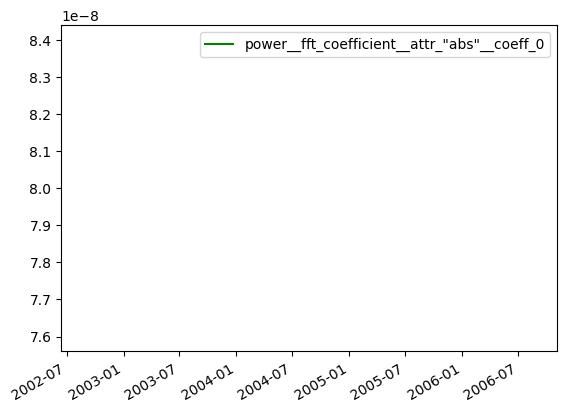

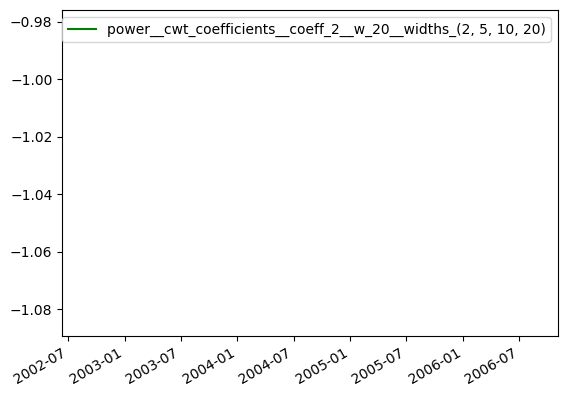

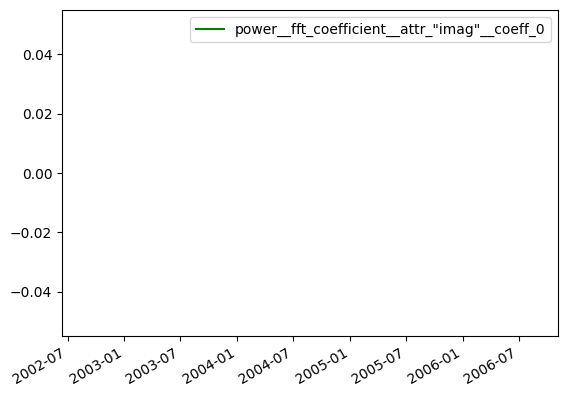

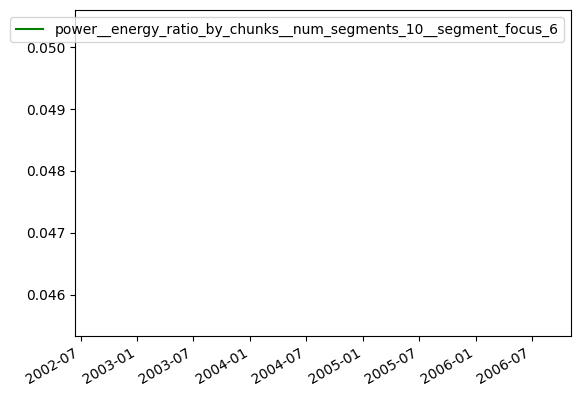

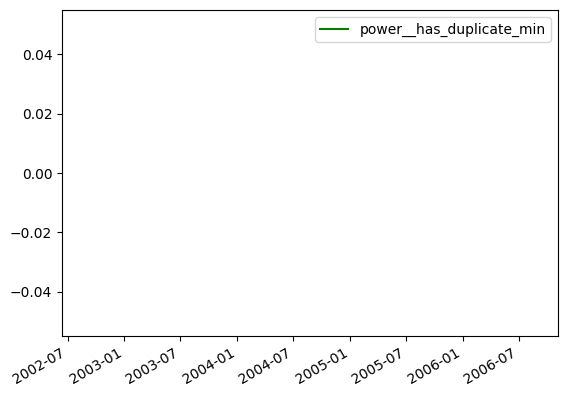

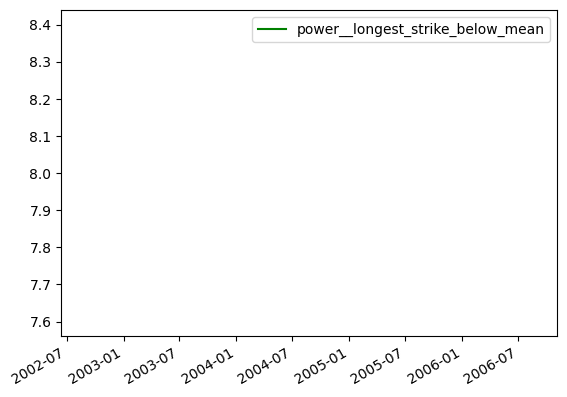

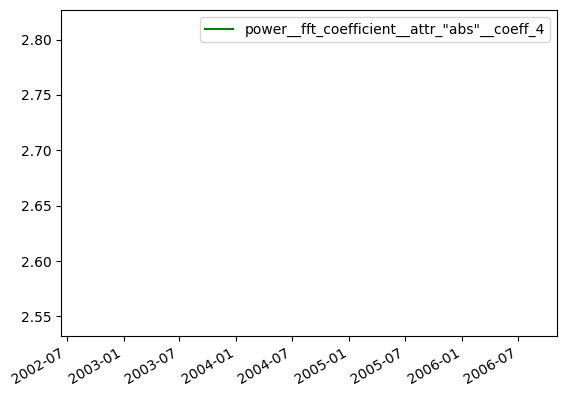

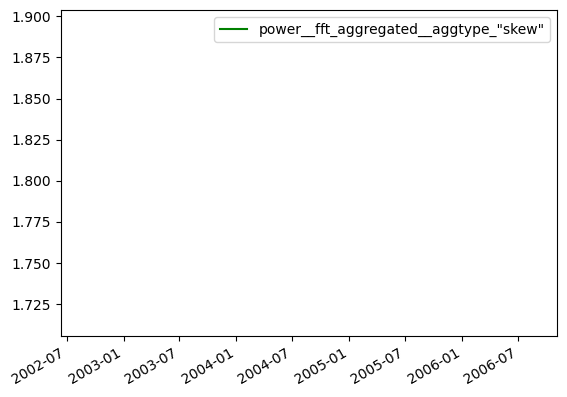

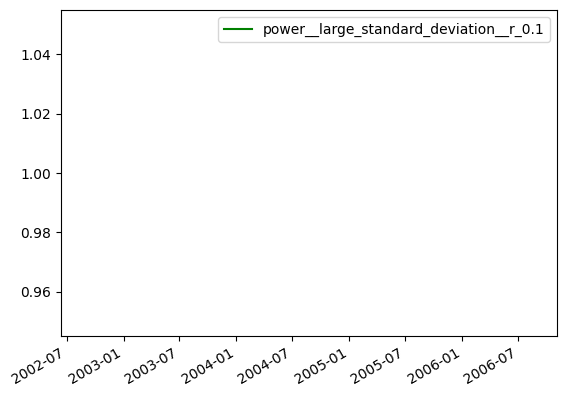

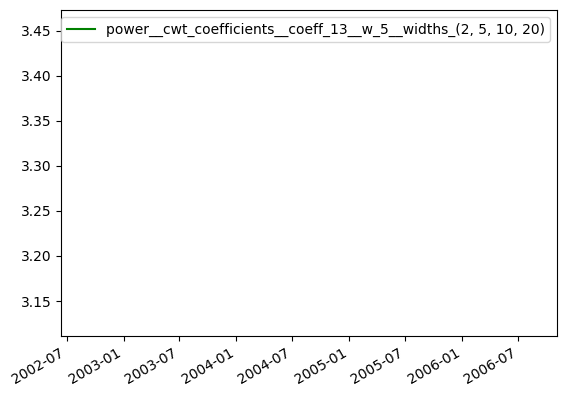

In [31]:
def print_randsamp_columns(randsamp_cols, df, pos_example):
    
    
    for col in randsamp_cols:
        if pos_example:
            lcolor='g'
        else:
            lcolor='r'
        plt.figure()
        power_extracted_df[col].plot(label=col, color=lcolor)
        plt.legend()
        plt.show()
        
    return

pos_example = np.all(power_extracted_df['label'] == 1)
print_randsamp_columns(power_extracted_df_cols_randsamp.columns, power_extracted_df[feats], pos_example)

### Now check how consistently extract features produced the same feature sets

In [18]:
sets = []
for i in np.arange(0, 100):
    extracted_df = pd.read_hdf('power.extract.h5', '/windows/data/{}'.format(i))
    columns_as_set = set(extracted_df.columns)
    sets.append(columns_as_set)

In [19]:
a = set.intersection(*sets)
a

{'label',
 'power__abs_energy',
 'power__absolute_maximum',
 'power__absolute_sum_of_changes',
 'power__agg_autocorrelation__f_agg_"mean"__maxlag_40',
 'power__agg_autocorrelation__f_agg_"median"__maxlag_40',
 'power__agg_autocorrelation__f_agg_"var"__maxlag_40',
 'power__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"max"',
 'power__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"mean"',
 'power__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"min"',
 'power__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"var"',
 'power__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"max"',
 'power__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"mean"',
 'power__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"min"',
 'power__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"var"',
 'power__agg_linear_trend__attr_"rvalue"__chunk_len_10__f_agg_"max"',
 'power__agg_linear_trend__attr_"rvalue"__chunk_len_10__f_agg_"mean"',
 'power__agg_

In [20]:
len(a)

417

## Check out sub-select

In [32]:
power_subselect_train_df = pd.read_hdf('power.subselect.h5', '/select/train')
power_subselect_train_df.shape

(765, 264)

In [33]:
power_subselect_test_df = pd.read_hdf('power.subselect.h5', '/select/test')
power_subselect_test_df.shape

(331, 264)

In [34]:
power_subselect_test_df.columns
power_subselect_test_df.index

DatetimeIndex(['2083-05-24', '2083-06-24', '2083-07-24', '2083-08-24',
               '2083-09-24', '2083-10-24', '2083-11-24', '2083-12-24',
               '2084-01-24', '2084-02-24',
               ...
               '2082-07-24', '2082-08-24', '2082-09-24', '2082-10-24',
               '2082-11-24', '2082-12-24', '2083-01-24', '2083-02-24',
               '2083-03-24', '2083-04-24'],
              dtype='datetime64[ns]', name='index', length=331, freq=None)

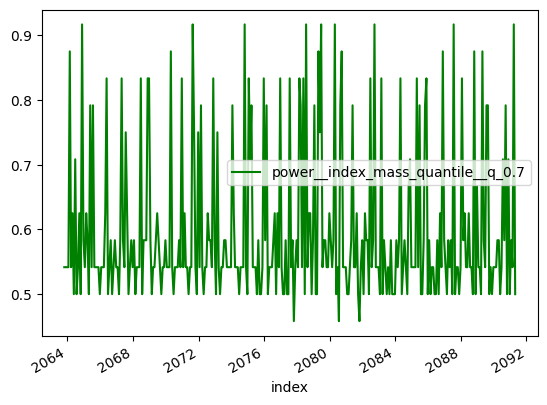

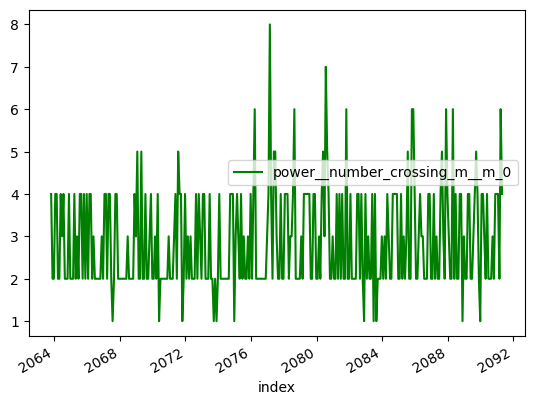

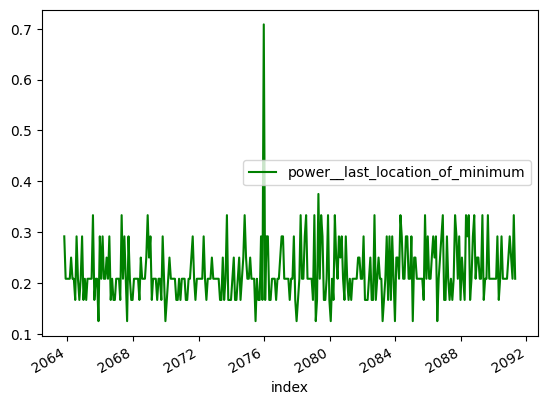

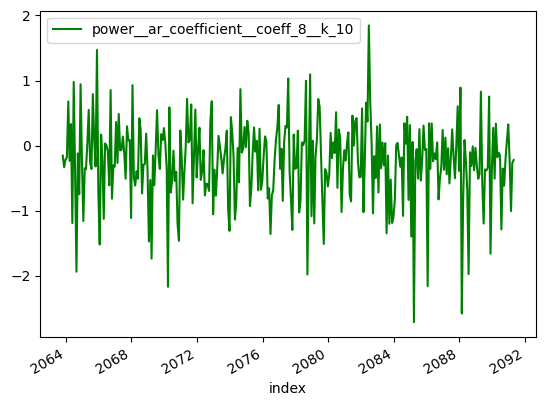

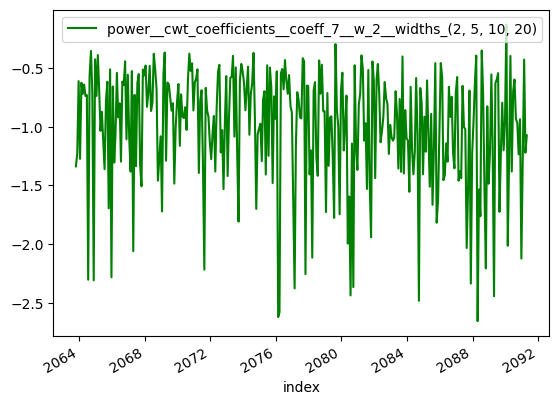

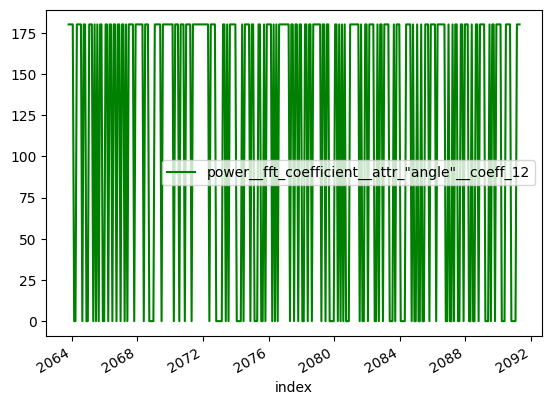

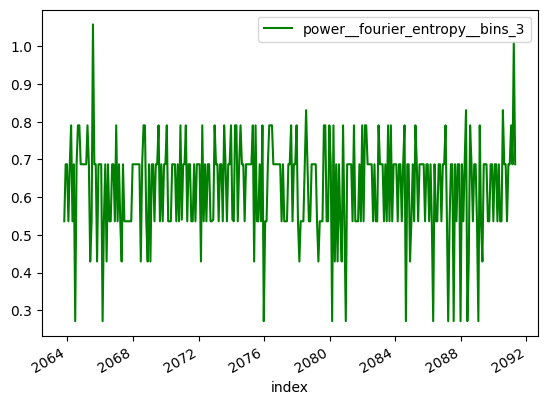

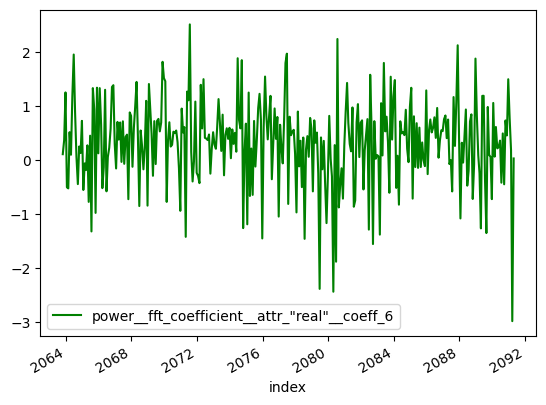

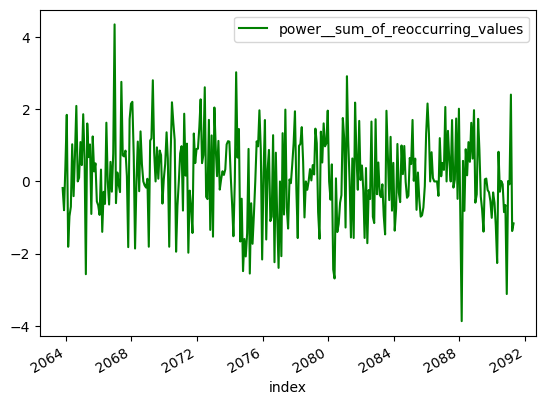

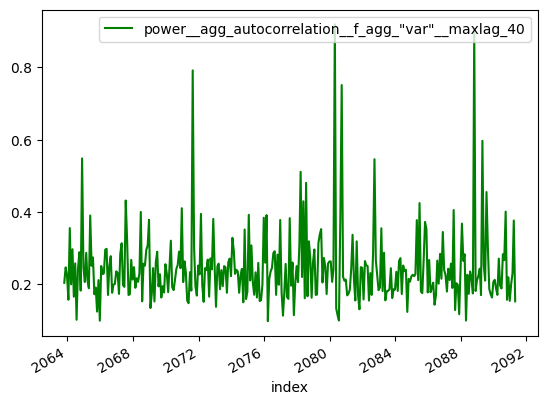

In [35]:
power_subselect_test_df_cols_randsamp = power_subselect_test_df.sample(n=10,axis='columns')

for col in power_subselect_test_df_cols_randsamp.columns:
    if pos_example:
        lcolor='g'
    else:
        lcolor='r'
    plt.figure()
    power_subselect_test_df[col].plot(label=col, color=lcolor)
    plt.legend()
    plt.show()

In [36]:
power_subselect_train_df_cols_randsamp = power_subselect_train_df.sample(n=10,axis='columns')

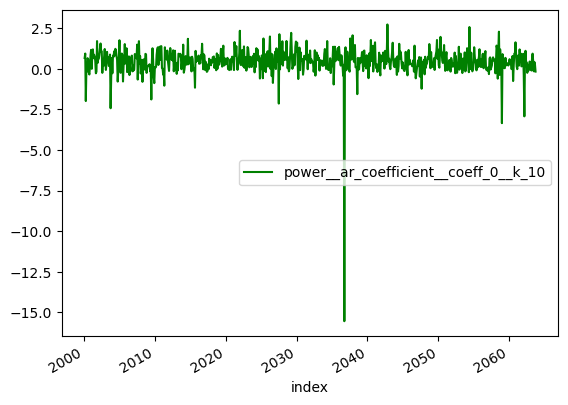

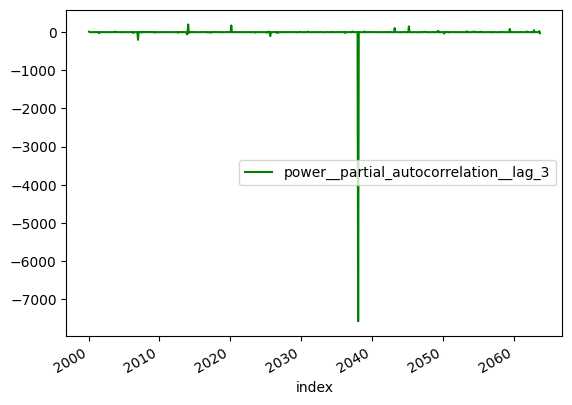

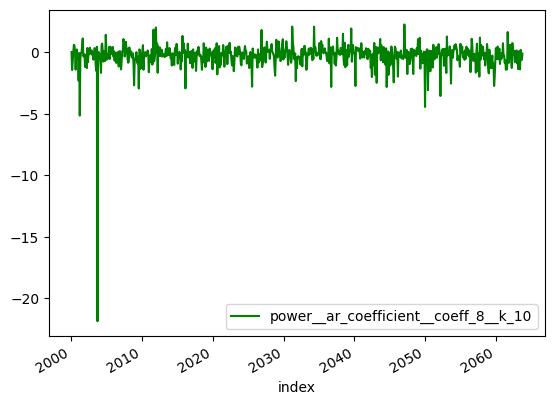

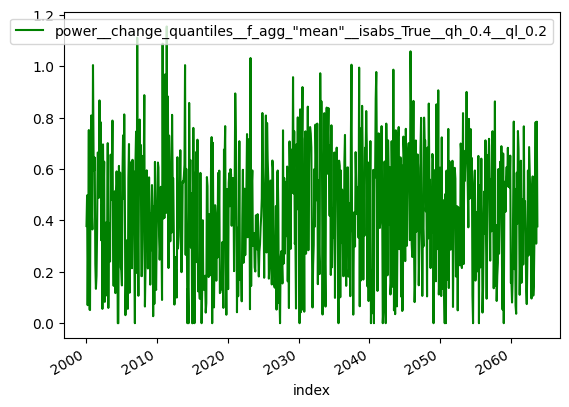

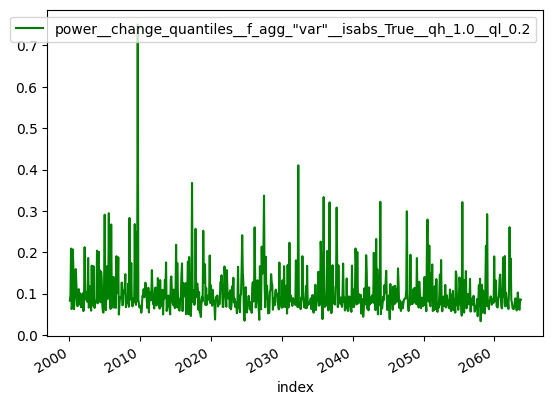

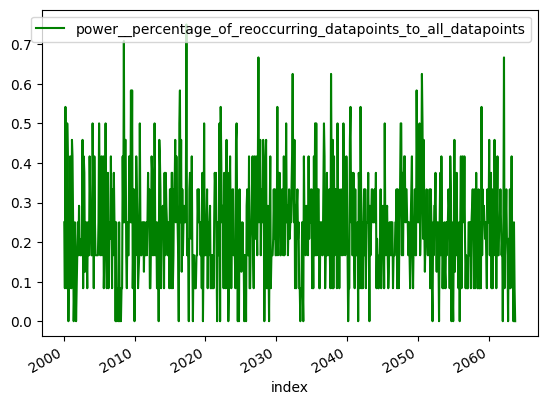

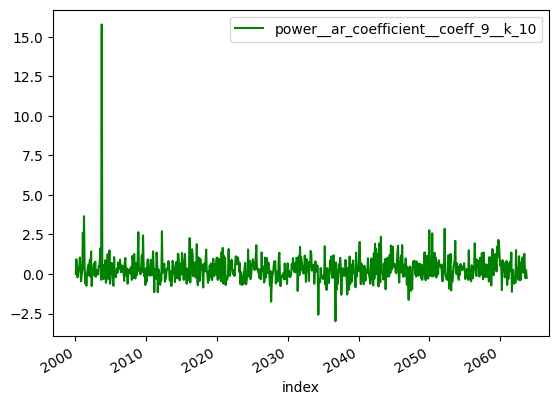

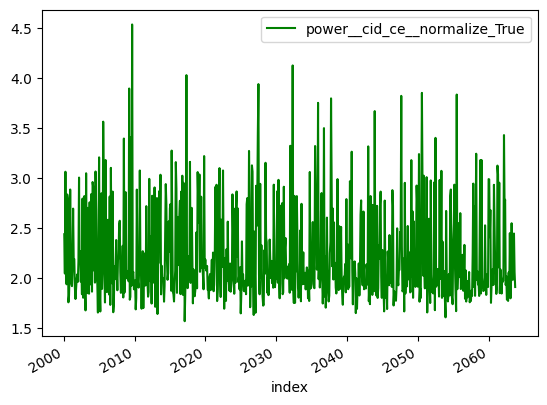

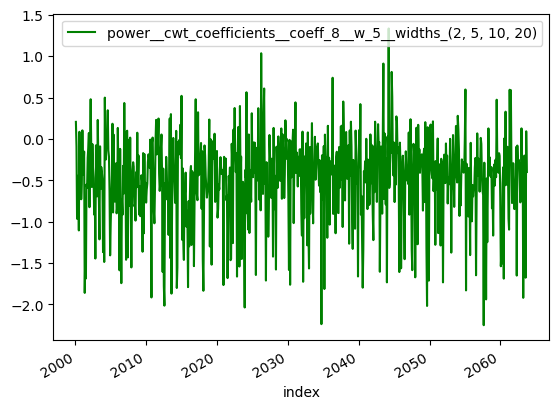

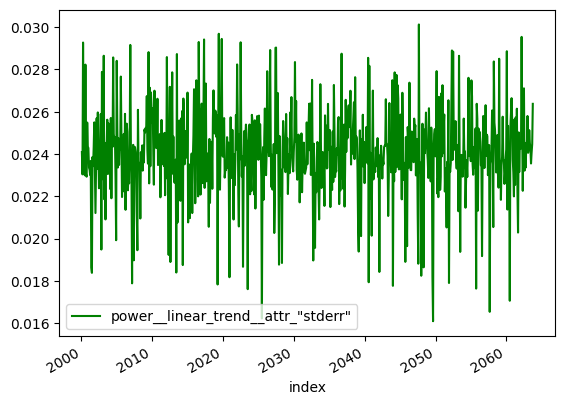

In [37]:
for col in power_subselect_train_df_cols_randsamp.columns:
    if pos_example:
        lcolor='g'
    else:
        lcolor='r'
    plt.figure()
    power_subselect_train_df[col].plot(label=col, color=lcolor)
    plt.legend()
    plt.show()

In [38]:
power_subselect_train_df.index

DatetimeIndex(['2000-01-24', '2000-02-24', '2000-11-24', '2008-05-24',
               '2008-06-24', '2008-07-24', '2008-08-24', '2008-09-24',
               '2008-10-24', '2008-11-24',
               ...
               '2007-07-24', '2007-08-24', '2007-09-24', '2007-10-24',
               '2007-11-24', '2007-12-24', '2008-01-24', '2008-02-24',
               '2008-03-24', '2008-04-24'],
              dtype='datetime64[ns]', name='index', length=765, freq=None)

In [39]:
power_subselect_test_df.index

DatetimeIndex(['2083-05-24', '2083-06-24', '2083-07-24', '2083-08-24',
               '2083-09-24', '2083-10-24', '2083-11-24', '2083-12-24',
               '2084-01-24', '2084-02-24',
               ...
               '2082-07-24', '2082-08-24', '2082-09-24', '2082-10-24',
               '2082-11-24', '2082-12-24', '2083-01-24', '2083-02-24',
               '2083-03-24', '2083-04-24'],
              dtype='datetime64[ns]', name='index', length=331, freq=None)

In [40]:
power_subselect_train_df.shape

(765, 264)

In [41]:
power_subselect_test_df.shape

(331, 264)